In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers
import matplotlib.pyplot as plt
import pandas as pd
import optuna
from sklearn.ensemble import RandomForestRegressor


C:\Users\user\AppData\Local\Temp\ipykernel_5964\1665984961.py:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]


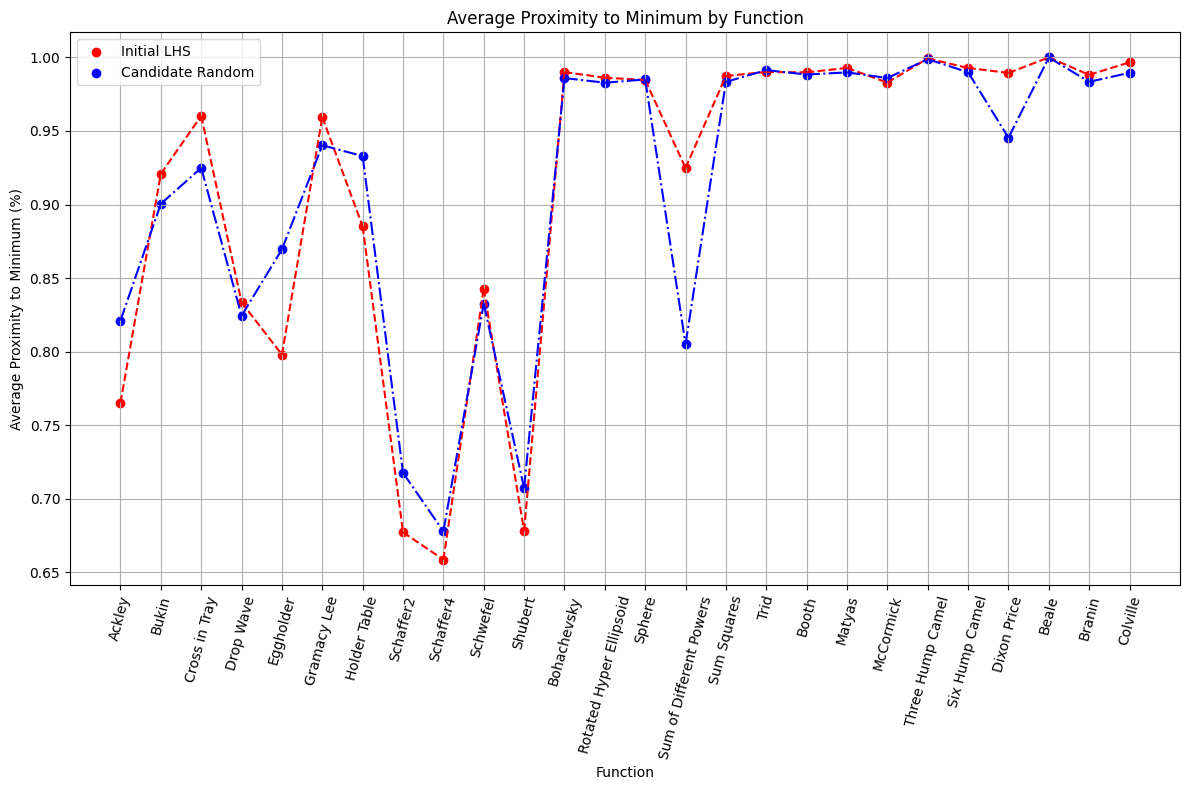

In [3]:
#Optuna vs LHS
#50 run


function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 30

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}
average_proximities_second = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

#Optuna
for function_name in function_names:
    if True:
        #print(f"Working on function: {function_name}")
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    #print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    def objective(trial):
                        ranges = ex_func.function_ranges[function_name]
                        
                        params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
                        
                        return function_param(params)
                    
                    optuna.logging.set_verbosity(optuna.logging.WARNING)
                    study = optuna.create_study(direction='minimize')
                    study.optimize(objective, n_trials=25)

                    #print('Best parameters:', study.best_params)
                    #print('Best value:', study.best_value)
                    
                    iteration_count += 25
                    minimum_value_so_far = study.best_value
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")7

                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

                

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            #print(average_proximity_to_minimum_by_percent)

            #print("******")
            #print("******")
            
# LHS
for function_name in function_names:
    if True:
        #print(f"Working on function: {function_name}")
    
        proximity_to_minimum_count_second = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_values, improvement, new_points_all, iteration = active_learning.run_active_learning_constant_iterations_25(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count_second += current_proximity
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum_second = proximity_to_minimum_count_second/number_of_repeats
            

            average_proximity_to_minimum_by_percent_second = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum_second-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities_second["Function"].append(function_name)
            average_proximities_second["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent_second)
            #print(average_iterations)
            #print(average_proximity_to_minimum_by_percent_second)

            #print("******")
            #print("******")










# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Convert the dictionary to a DataFrame
average_proximities_df_second = pd.DataFrame(average_proximities_second)

plt.figure(figsize=(12, 8))

# İlk veri kümesini çizdirme
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):

    # Scatter plot - kırmızı renk
    plt.scatter(i, proximity, color='red', label="Initial LHS" if i == 0 else '')

    # Line plot
    if i < len(average_proximities_df["Function"]) - 1:
        plt.plot([i, i + 1], [proximity, average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='red', linestyle='--')

# İkinci veri kümesini çizdirme
for i, (function, proximity) in enumerate(zip(average_proximities_df_second["Function"], average_proximities_df_second["Average Proximity to Minimum (%)"])):

    # Scatter plot - mavi renk
    plt.scatter(i, proximity, color='blue', label="Candidate Random" if i == 0 else '')

    # Line plot
    if i < len(average_proximities_df_second["Function"]) - 1:
        plt.plot([i, i + 1], [proximity, average_proximities_df_second["Average Proximity to Minimum (%)"][i + 1]], color='blue', linestyle='-.')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=75)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.legend()
plt.show()